In [16]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import re
import string

In [18]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
train_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Corona_NLP_train.csv",encoding='latin_1')
test_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Corona_NLP_test.csv",encoding='latin_1')

In [20]:
print("Train data shape: ", train_df.shape)
print("Test data shape: ", test_df.shape)

Train data shape:  (41157, 6)
Test data shape:  (3798, 6)


In [21]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [22]:
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [25]:
#checking duplicated records
print("Duplicated Records in Training data :",train_df.duplicated().sum())
print("Duplicated Records in Test data :",test_df.duplicated().sum())

Duplicated Records in Training data : 0
Duplicated Records in Test data : 0


In [26]:
train_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [27]:
test_df.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [28]:
train_df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [29]:
test_df.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


In [30]:
train_df["Location"].value_counts()

London                            540
United States                     528
London, England                   520
New York, NY                      395
Washington, DC                    373
                                 ... 
Riverside, California               1
Portarlington, Victoria             1
Ho, Accra, Akosombo.                1
Mars since Trump                    1
shaheen bagh ,New Delhi, India      1
Name: Location, Length: 12220, dtype: int64

In [31]:
train_df["Location"].nunique()

12220

In [32]:
test_df["Location"].nunique()

1717

In [33]:

train_df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [34]:
test_df["Sentiment"].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

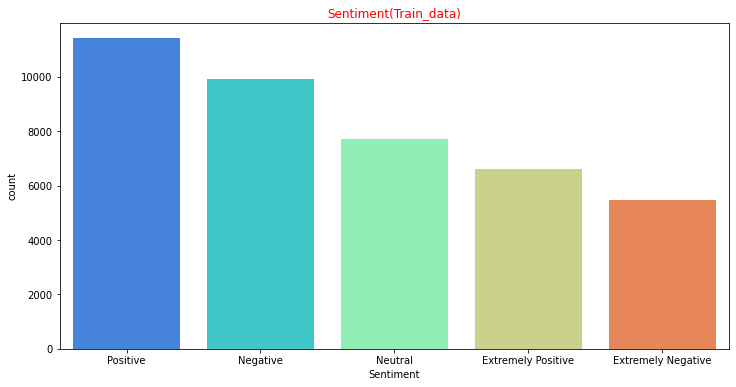

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(train_df["Sentiment"], order=train_df["Sentiment"].value_counts().index,palette="rainbow")
plt.title("Sentiment(Train_data)",color="red")
plt.show()

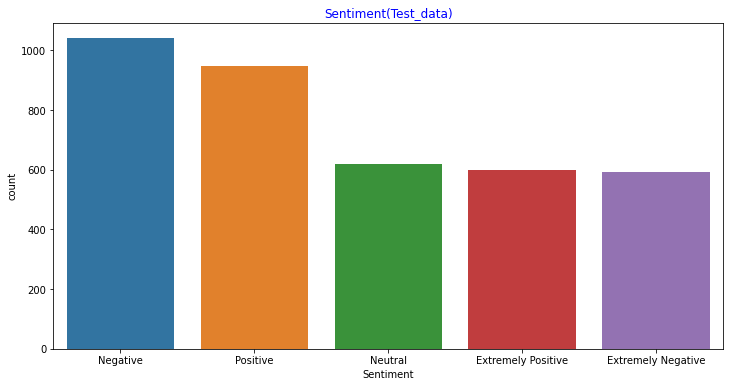

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(test_df["Sentiment"], order=test_df["Sentiment"].value_counts().index)
plt.title("Sentiment(Test_data)",color="blue")
plt.show()

In [37]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [38]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [39]:


print("Missing Values Train data ")
train_df.isnull().sum()

Missing Values Train data 


index            0
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [40]:
print("Missing Values Test data ")
test_df.isnull().sum()

Missing Values Test data 


index            0
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [41]:
print("Train data shape: ", train_df.shape)
print("Test data shape: ", test_df.shape)

Train data shape:  (32567, 7)
Test data shape:  (2964, 7)


In [42]:
train_df["Sentiment"]=train_df["Sentiment"].replace({"Extremely Positive":"Positive","Extremely Negative":"Negative",
                                                     "Neutral Sentiment":"Neutral"})
test_df["Sentiment"]=test_df["Sentiment"].replace({"Extremely Positive":"Positive","Extremely Negative":"Negative",
                                                     "Neutral Sentiment":"Neutral"})

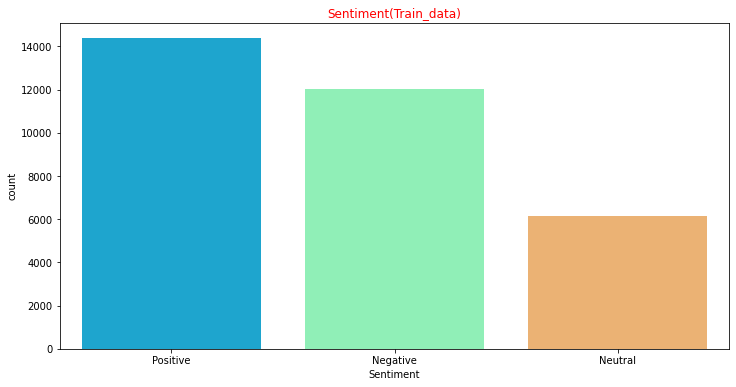

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(train_df["Sentiment"], order=train_df["Sentiment"].value_counts().index,palette="rainbow")
plt.title("Sentiment(Train_data)",color="red")
plt.show()

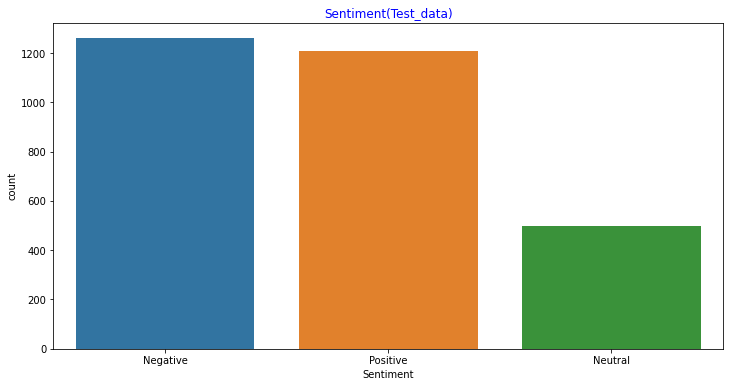

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(test_df["Sentiment"], order=test_df["Sentiment"].value_counts().index)
plt.title("Sentiment(Test_data)",color="blue")
plt.show()

In [45]:
train_df["Tweet_Length"]=train_df["OriginalTweet"].str.len()
test_df["Tweet_Length"]=test_df["OriginalTweet"].str.len()

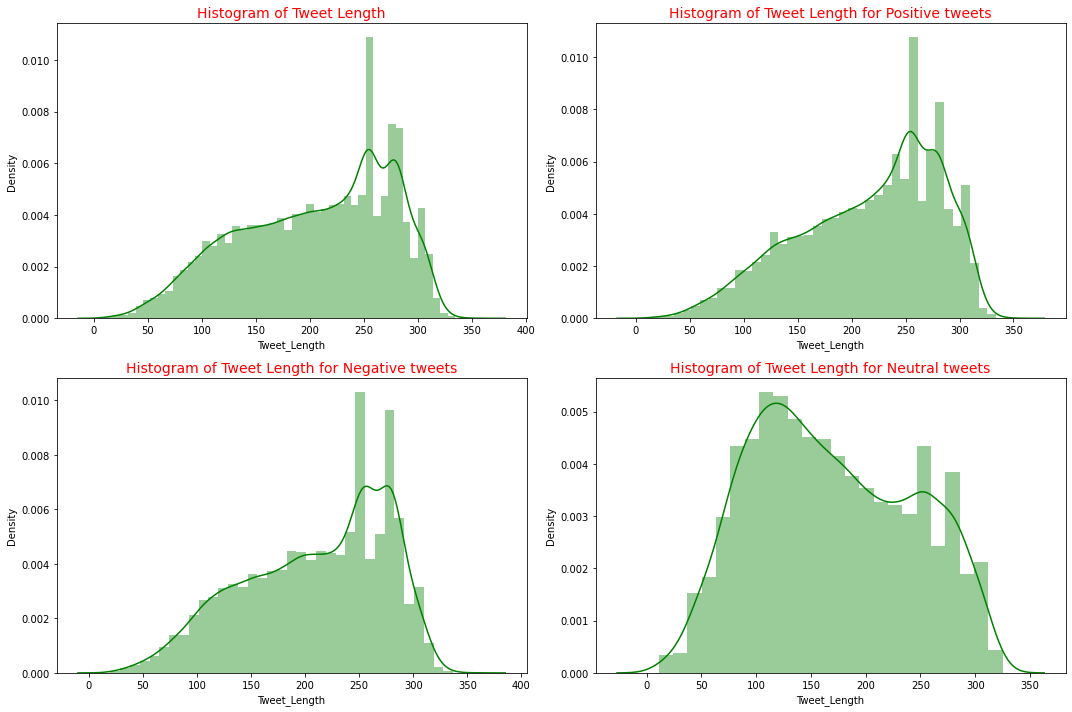

In [46]:
fig,axis=plt.subplots(2,2,figsize=(15,10))

a=sns.distplot(train_df["Tweet_Length"],color="green",ax=axis[0][0])
a.set_title("Histogram of Tweet Length",color="red",size=14)
b=sns.distplot(train_df[train_df["Sentiment"]=="Positive"]["Tweet_Length"],color="green",ax=axis[0][1])
b.set_title("Histogram of Tweet Length for Positive tweets",color="red",size=14)
c=sns.distplot(train_df[train_df["Sentiment"]=="Negative"]["Tweet_Length"],color="green",ax=axis[1][0])
c.set_title("Histogram of Tweet Length for Negative tweets",color="red",size=14)
d=sns.distplot(train_df[train_df["Sentiment"]=="Neutral"]["Tweet_Length"],color="green",ax=axis[1][1])
d.set_title("Histogram of Tweet Length for Neutral tweets",color="red",size=14)
plt.tight_layout()
plt.show()

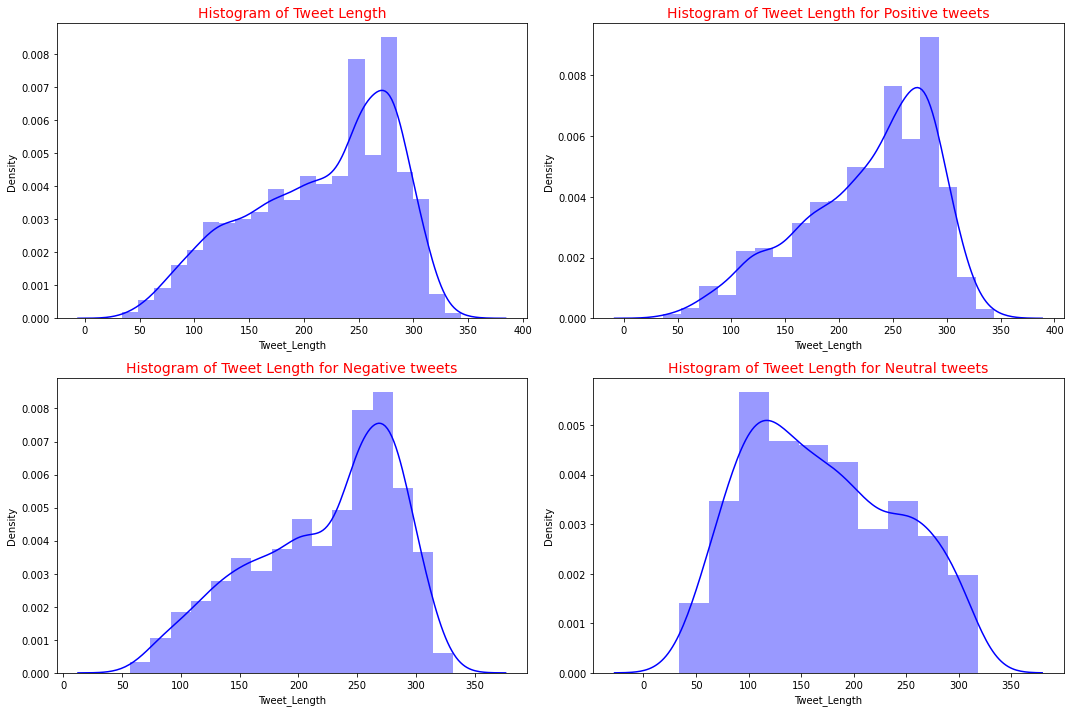

In [47]:
fig,axis=plt.subplots(2,2,figsize=(15,10))

a=sns.distplot(test_df["Tweet_Length"],color="blue",ax=axis[0][0])
a.set_title("Histogram of Tweet Length",color="red",size=14)
b=sns.distplot(test_df[test_df["Sentiment"]=="Positive"]["Tweet_Length"],color="blue",ax=axis[0][1])
b.set_title("Histogram of Tweet Length for Positive tweets",color="red",size=14)
c=sns.distplot(test_df[test_df["Sentiment"]=="Negative"]["Tweet_Length"],color="blue",ax=axis[1][0])
c.set_title("Histogram of Tweet Length for Negative tweets",color="red",size=14)
d=sns.distplot(test_df[test_df["Sentiment"]=="Neutral"]["Tweet_Length"],color="blue",ax=axis[1][1])
d.set_title("Histogram of Tweet Length for Neutral tweets",color="red",size=14)
plt.tight_layout()
plt.show()


In [48]:
train_df.describe()

,index,UserName,ScreenName,Tweet_Length
count,32567.000000,32567.000000,32567.000000,32567.000000
mean,20619.499309,24418.499309,69370.499309,204.802684
std,11899.886650,11899.886650,11899.886650,68.713615
min,0.000000,3799.000000,48751.000000,11.000000
25%,10203.500000,14002.500000,58954.500000,151.000000
50%,20777.000000,24576.000000,69528.000000,215.000000
75%,30948.500000,34747.500000,79699.500000,260.000000
max,41156.000000,44955.000000,89907.000000,355.000000


In [49]:
test_df.describe()

,index,UserName,ScreenName,Tweet_Length
count,2964.000000,2964.000000,2964.000000,2964.000000
mean,1901.295884,1902.295884,46854.295884,214.675776
std,1103.014902,1103.014902,1103.014902,66.477028
min,0.000000,1.000000,44953.000000,34.000000
25%,934.500000,935.500000,45887.500000,164.000000
50%,1914.000000,1915.000000,46867.000000,228.000000
75%,2869.500000,2870.500000,47822.500000,272.000000
max,3797.000000,3798.000000,48750.000000,344.000000


In [50]:
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder()
train_df['Label'] = labelEncode.fit_transform(train_df['Sentiment'])
print(train_df['Label'].unique())
train_df

[1 2 0]


,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet_Length,Label
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,1
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,2
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,2
3,5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,250,2
4,6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,180,2
...,...,...,...,...,...,...,...,...,...
32562,41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,82,0
32563,41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,177,0
32564,41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,199,2
32565,41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102,1


In [51]:
labelEncode = LabelEncoder()
test_df['Label'] = labelEncode.fit_transform(test_df['Sentiment'])
print(test_df['Label'].unique())
test_df

[0 2 1]


,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet_Length,Label
0,0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative,228,0
1,1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,2
2,3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,0
3,4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,1
4,5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,205,1
...,...,...,...,...,...,...,...,...,...
2959,3792,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,215,0
2960,3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127,2
2961,3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213,0
2962,3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185,1


In [52]:
train_df.groupby(["Sentiment","Label"]).size()

Sentiment  Label
Negative   0        12012
Neutral    1         6172
Positive   2        14383
dtype: int64

In [53]:

train_df["Sentiment"].value_counts()

Positive    14383
Negative    12012
Neutral      6172
Name: Sentiment, dtype: int64

In [54]:
test_df.groupby(["Sentiment","Label"]).size()

Sentiment  Label
Negative   0        1260
Neutral    1         497
Positive   2        1207
dtype: int64

In [55]:

test_df["Sentiment"].value_counts()

Negative    1260
Positive    1207
Neutral      497
Name: Sentiment, dtype: int64

In [56]:
lem=WordNetLemmatizer()
def textCleaning(text):
    stop_words = stopwords.words("english")
    text = re.sub(r'http\S+', " ", text)
    text = re.sub(r'[^a-zA-Z]'," ",text)
    text = text.lower()
    text = re.sub('r<.*?>',' ', text)
    text = text.split()
    text = " ".join([lem.lemmatize(word) for word in text if not word in stop_words])
    for punctuation in string.punctuation:
        text = text.replace(punctuation, " ")
    return text


In [62]:
nltk.download('wordnet')
train_df["TextProcessed"]=train_df["OriginalTweet"].apply(lambda x: textCleaning(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [63]:
test_df["TextProcessed"]=test_df["OriginalTweet"].apply(lambda x: textCleaning(x))

In [64]:
nltk.download('punkt')
train_df["Tokenized"]=train_df["TextProcessed"].apply(lambda x: nltk.word_tokenize(x))
test_df["Tokenized"]=test_df["TextProcessed"].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [65]:
train_df

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet_Length,Label,TextProcessed,Tokenized
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,1,menyrbie phil gahan chrisitv,"[menyrbie, phil, gahan, chrisitv]"
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,2,advice talk neighbour family exchange phone nu...,"[advice, talk, neighbour, family, exchange, ph..."
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,2,coronavirus australia woolworth give elderly d...,"[coronavirus, australia, woolworth, give, elde..."
3,5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,250,2,news region first confirmed covid case came su...,"[news, region, first, confirmed, covid, case, ..."
4,6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,180,2,cashier grocery store sharing insight covid pr...,"[cashier, grocery, store, sharing, insight, co..."
...,...,...,...,...,...,...,...,...,...,...,...
32562,41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,82,0,really shitting much home covid coronavirus to...,"[really, shitting, much, home, covid, coronavi..."
32563,41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,177,0,still shocked number toronto supermarket emplo...,"[still, shocked, number, toronto, supermarket,..."
32564,41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,199,2,never situation amp world going supermarket pi...,"[never, situation, amp, world, going, supermar..."
32565,41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102,1,airline pilot offering stock supermarket shelf...,"[airline, pilot, offering, stock, supermarket,..."


In [66]:
train_df["Token_Len"]=train_df["Tokenized"].apply(lambda x: len(x))
test_df["Token_Len"]=test_df["Tokenized"].apply(lambda x: len(x))

In [67]:
print("Zero Token records count in Train:",len(train_df[train_df["Token_Len"]==0]))
print("Zero Token records count in Test:",len(test_df[train_df["Token_Len"]==0]))

Zero Token records count in Train: 11
Zero Token records count in Test: 2


In [68]:
train_df=train_df[train_df["Token_Len"]!=0]
test_df=test_df[test_df["Token_Len"]!=0]
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

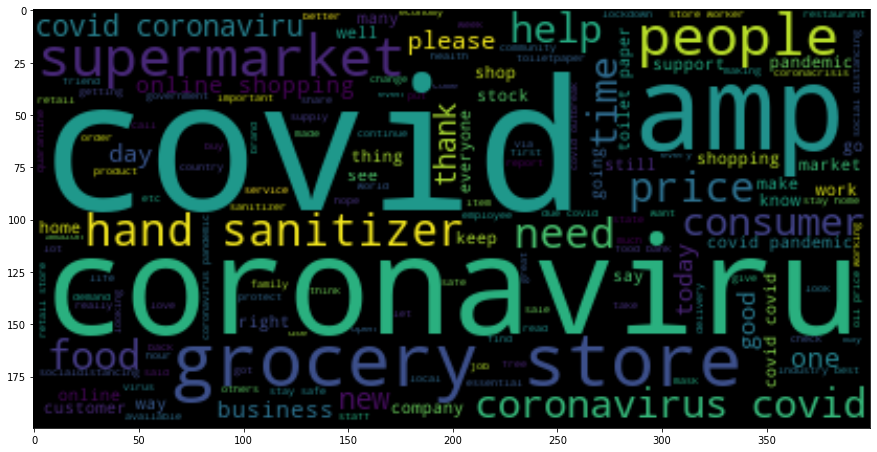

In [69]:
#WORD CLOUD 1
PositiveWords=" ".join(train_df[train_df["Label"] == 2]["TextProcessed"])
plt.figure(figsize = (15,10)) 
wordcould = WordCloud(max_words = 2500).generate(PositiveWords)
plt.imshow(wordcould,interpolation = 'bilinear')

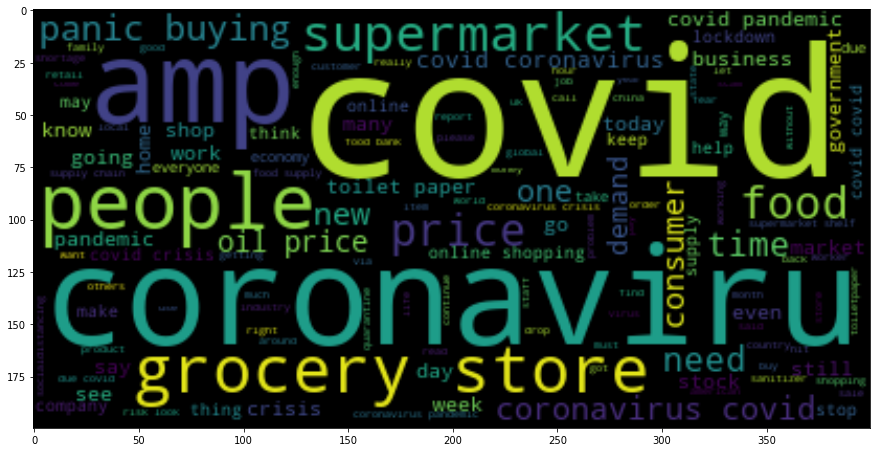

In [70]:
#WORD CLOUD 2
NegativeWords=" ".join(train_df[train_df["Label"] == 0]["TextProcessed"])
plt.figure(figsize = (15,10)) 
wordcould = WordCloud(max_words = 2500).generate(NegativeWords)
plt.imshow(wordcould,interpolation = 'bilinear')

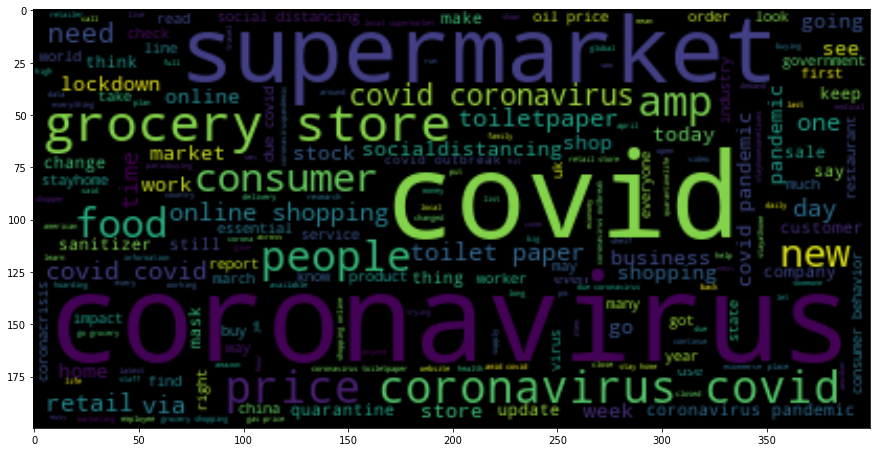

In [71]:
#WORD CLOUD 3
NeutralWords=" ".join(train_df[train_df["Label"] == 1]["TextProcessed"])
plt.figure(figsize = (15,10)) 
wordcould = WordCloud(max_words = 2500).generate(NeutralWords)
plt.imshow(wordcould,interpolation = 'bilinear')

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
CountVector=CountVectorizer()
Train_counts=CountVector.fit_transform(train_df["TextProcessed"])
y_train=train_df["Label"].copy()

In [73]:
Test_counts=CountVector.transform(test_df["TextProcessed"])
y_test=test_df["Label"].copy()

In [74]:
from sklearn.naive_bayes import MultinomialNB
Model1 = MultinomialNB()
Model1.fit(Train_counts, y_train)

MultinomialNB()

In [75]:

Test_Predict=Model1.predict(Test_counts)

In [76]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_auc_score
print(accuracy_score(Test_Predict,y_test))
print(confusion_matrix(Test_Predict,y_test))
print(classification_report(Test_Predict,y_test))

0.6656545209176788
[[930 172 233]
 [ 31  81  12]
 [299 244 962]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1335
           1       0.16      0.65      0.26       124
           2       0.80      0.64      0.71      1505

    accuracy                           0.67      2964
   macro avg       0.57      0.66      0.56      2964
weighted avg       0.74      0.67      0.69      2964



In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfVector=TfidfVectorizer(max_features=25000)
Train_counts1=TfVector.fit_transform(train_df["TextProcessed"])

In [78]:
Test_counts1=TfVector.transform(test_df["TextProcessed"])

In [79]:
Model2 = MultinomialNB()
Model2.fit(Train_counts1, y_train)

MultinomialNB()

In [80]:
Test_Predict2=Model2.predict(Test_counts1)

In [82]:
print(accuracy_score(Test_Predict2,y_test))
print(confusion_matrix(Test_Predict2,y_test))
print(classification_report(Test_Predict2,y_test))

0.6342780026990553
[[ 799  125  134]
 [   2    9    1]
 [ 459  363 1072]]
              precision    recall  f1-score   support

           0       0.63      0.76      0.69      1058
           1       0.02      0.75      0.04        12
           2       0.89      0.57      0.69      1894

    accuracy                           0.63      2964
   macro avg       0.51      0.69      0.47      2964
weighted avg       0.79      0.63      0.69      2964



In [83]:
from collections import Counter

In [84]:
Corpus=[]
for i in range(len(train_df)):
  textlist=train_df["Tokenized"][i]
  for token in textlist:
    Corpus.append(token)
TextCounter=Counter(Corpus)
UniqueCount=len(set(Corpus))
print("unique count of words:",len(set(Corpus)))
print(TextCounter.most_common(200))
print(TextCounter[" "])

unique count of words: 41677
[('covid', 18377), ('coronavirus', 14535), ('price', 7093), ('store', 6517), ('supermarket', 6047), ('food', 5757), ('grocery', 5312), ('consumer', 4443), ('people', 4283), ('amp', 4255), ('shopping', 2886), ('online', 2805), ('pandemic', 2723), ('time', 2559), ('need', 2542), ('u', 2479), ('get', 2357), ('worker', 2256), ('hand', 2139), ('panic', 1985), ('home', 1947), ('demand', 1941), ('sanitizer', 1902), ('go', 1892), ('like', 1884), ('help', 1781), ('stock', 1688), ('one', 1674), ('supply', 1621), ('day', 1565), ('going', 1503), ('due', 1489), ('work', 1453), ('mask', 1435), ('business', 1425), ('new', 1419), ('crisis', 1403), ('oil', 1393), ('buying', 1377), ('week', 1375), ('please', 1279), ('toiletpaper', 1268), ('retail', 1264), ('delivery', 1225), ('today', 1196), ('shop', 1186), ('toilet', 1185), ('paper', 1185), ('shelf', 1182), ('market', 1181), ('good', 1176), ('local', 1171), ('make', 1144), ('stay', 1143), ('keep', 1134), ('via', 1132), ('es

In [85]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import  one_hot
from tensorflow.keras import layers

In [86]:
OnehotRepTrain=train_df["TextProcessed"].apply(lambda x: one_hot(x,UniqueCount))
OnehotRepTest=test_df["TextProcessed"].apply(lambda x: one_hot(x,UniqueCount))

In [87]:
OnehotRepTest

0       [30955, 3726, 17007, 30255, 25541, 35814, 3750...
1       [5807, 26163, 36651, 18828, 3451, 5990, 35653,...
2       [28930, 5979, 10862, 38065, 35629, 1870, 39214...
3       [18099, 10809, 40498, 5273, 18307, 28478, 2346...
4       [23861, 26615, 30845, 34260, 25854, 17026, 144...
                              ...                        
2959    [20131, 24145, 20306, 26305, 6107, 2330, 2319,...
2960    [24241, 35814, 24387, 9263, 19002, 24004, 400,...
2961    [28930, 11854, 11399, 28382, 7717, 781, 15541,...
2962    [39737, 4218, 20162, 41041, 26320, 4186, 24522...
2963    [19157, 37105, 1080, 26236, 25691, 17939, 1216...
Name: TextProcessed, Length: 2964, dtype: object

In [88]:
MaxVectorSize=max(train_df["Token_Len"])
print(MaxVectorSize)

47


In [89]:
paddedTrain=pad_sequences(OnehotRepTrain,padding="post", maxlen=MaxVectorSize)
print(paddedTrain[0])

[12669  8515 29828   927     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0]


In [90]:
paddedTest=pad_sequences(OnehotRepTest,padding="post", maxlen=MaxVectorSize)

In [91]:
Vectorsize=100
Model3=Sequential()
Model3.add(Embedding(UniqueCount,Vectorsize,input_length=MaxVectorSize))
Model3.add(layers.LSTM(100))
Model3.add(layers.Dense(64, activation="relu"))
Model3.add(layers.Dense(32, activation="relu"))
Model3.add(layers.Dense(16, activation="relu"))
Model3.add(Dense(3,activation="softmax"))
Model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(Model3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 100)           4167700   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 4,257,223
Trainable params: 4,257,223
Non-

In [92]:
Vectorsize=100
Model3=Sequential()
Model3.add(Embedding(input_dim=UniqueCount, output_dim=Vectorsize, input_length=MaxVectorSize))
Model3.add(LSTM(500,return_sequences=True))
Model3.add(Dense(300, activation='relu'))
Model3.add(LSTM(300,return_sequences=True))
Model3.add(Dense(300, activation='relu'))
Model3.add(Dense(200, activation='relu'))
Model3.add(Dropout(0.5))
Model3.add(LSTM(100))
Model3.add(Dense(100, activation='relu'))
Model3.add(Dropout(0.2))
Model3.add(Dense(3,activation="softmax"))
Model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(Model3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 47, 100)           4167700   
                                                                 
 lstm_1 (LSTM)               (None, 47, 500)           1202000   
                                                                 
 dense_4 (Dense)             (None, 47, 300)           150300    
                                                                 
 lstm_2 (LSTM)               (None, 47, 300)           721200    
                                                                 
 dense_5 (Dense)             (None, 47, 300)           90300     
                                                                 
 dense_6 (Dense)             (None, 47, 200)           60200     
                                                                 
 dropout (Dropout)           (None, 47, 200)          

In [93]:
trainX=np.array(paddedTrain)
testX=np.array(paddedTest)
trainY=np.array(y_train)
testY=np.array(y_test)

In [94]:
trainX.shape

(32556, 47)

In [70]:
Model3.fit(trainX,y_train,validation_data=(testX,y_test),epochs=10,batch_size=100)


Epoch 1/10
326/326 [==============================] - 415s 1s/step - loss: 1.0308 - accuracy: 0.4403 - val_loss: 1.0277 - val_accuracy: 0.4072
Epoch 2/10
326/326 [==============================] - 409s 1s/step - loss: 1.0281 - accuracy: 0.4488 - val_loss: 1.0348 - val_accuracy: 0.3998
Epoch 3/10
326/326 [==============================] - 410s 1s/step - loss: 1.0266 - accuracy: 0.4408 - val_loss: 1.0415 - val_accuracy: 0.4072
Epoch 4/10
326/326 [==============================] - 410s 1s/step - loss: 1.0287 - accuracy: 0.4411 - val_loss: 1.0243 - val_accuracy: 0.4072
Epoch 5/10
326/326 [==============================] - 413s 1s/step - loss: 1.0275 - accuracy: 0.4412 - val_loss: 1.0207 - val_accuracy: 0.4072
Epoch 6/10
326/326 [==============================] - 416s 1s/step - loss: 1.0264 - accuracy: 0.4420 - val_loss: 1.0249 - val_accuracy: 0.4072
Epoch 7/10
326/326 [==============================] - 414s 1s/step - loss: 1.0253 - accuracy: 0.4418 - val_loss: 1.0252 - val_accuracy: 0.4072

In [95]:
Vectorsize=100
Model4=Sequential()
Model4.add(Embedding(input_dim=UniqueCount, output_dim=Vectorsize, input_length=MaxVectorSize))
Model4.add(layers.LSTM(100))
Model4.add(layers.Dense(64, activation="relu"))
Model4.add(layers.Dense(32, activation="relu"))
Model4.add(layers.Dense(16, activation="relu"))
Model4.add(layers.Dense(3, activation='softmax'))
Model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(Model4.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 47, 100)           4167700   
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_9 (Dense)             (None, 64)                6464      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 3)                 51        
                                                                 
Total params: 4,257,223
Trainable params: 4,257,223
No

In [74]:
Model4.fit(trainX,y_train,validation_data=(testX,y_test),epochs=10,batch_size=64)

Epoch 1/10
509/509 [==============================] - 31s 57ms/step - loss: 1.0465 - accuracy: 0.4406 - val_loss: 1.0129 - val_accuracy: 0.4318
Epoch 2/10
509/509 [==============================] - 29s 56ms/step - loss: 0.8513 - accuracy: 0.5785 - val_loss: 0.7322 - val_accuracy: 0.6967
Epoch 3/10
509/509 [==============================] - 28s 56ms/step - loss: 0.5741 - accuracy: 0.7803 - val_loss: 0.6104 - val_accuracy: 0.7760
Epoch 4/10
509/509 [==============================] - 28s 56ms/step - loss: 0.4201 - accuracy: 0.8494 - val_loss: 0.5855 - val_accuracy: 0.7817
Epoch 5/10
509/509 [==============================] - 28s 55ms/step - loss: 0.3198 - accuracy: 0.8932 - val_loss: 0.6076 - val_accuracy: 0.7922
Epoch 6/10
509/509 [==============================] - 29s 56ms/step - loss: 0.2467 - accuracy: 0.9211 - val_loss: 0.6760 - val_accuracy: 0.7824
Epoch 7/10
509/509 [==============================] - 28s 55ms/step - loss: 0.2119 - accuracy: 0.9332 - val_loss: 0.6812 - val_accuracy:

In [76]:
Predicted=np.argmax(Model4.predict(testX), axis=1)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(classification_report(Predicted,y_test))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1196
           1       0.65      0.56      0.60       572
           2       0.77      0.78      0.77      1196

    accuracy                           0.75      2964
   macro avg       0.73      0.72      0.72      2964
weighted avg       0.75      0.75      0.75      2964



In [79]:
confusion_matrix(Predicted,y_test)

array([[965,  78, 153],
       [126, 323, 123],
       [169,  96, 931]])

In [87]:
Vectorsize=100
Model5=Sequential()
Model5.add(Embedding(input_dim=UniqueCount, output_dim=Vectorsize, input_length=MaxVectorSize))
Model5.add(layers.LSTM(100,return_sequences=True))
Model5.add(layers.Dense(64, activation="relu"))
Model5.add(layers.LSTM(50))
Model5.add(Dropout(0.2))
Model5.add(layers.Dense(32, activation="relu"))
Model5.add(layers.Dense(16, activation="relu"))
Model5.add(layers.Dense(3, activation='softmax'))
Model5.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(Model5.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 47, 100)           4167700   
                                                                 
 lstm_14 (LSTM)              (None, 47, 100)           80400     
                                                                 
 dense_26 (Dense)            (None, 47, 64)            6464      
                                                                 
 lstm_15 (LSTM)              (None, 50)                23000     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                1632      
                                                                 
 dense_28 (Dense)            (None, 16)               

In [88]:
Model5.fit(trainX,y_train,validation_data=(testX,y_test),epochs=10,batch_size=100)

Epoch 1/10
326/326 [==============================] - 47s 136ms/step - loss: 1.0154 - accuracy: 0.4654 - val_loss: 0.8976 - val_accuracy: 0.5432
Epoch 2/10
326/326 [==============================] - 44s 134ms/step - loss: 0.7862 - accuracy: 0.6526 - val_loss: 0.7130 - val_accuracy: 0.7267
Epoch 3/10
326/326 [==============================] - 44s 135ms/step - loss: 0.5155 - accuracy: 0.8187 - val_loss: 0.5601 - val_accuracy: 0.7888
Epoch 4/10
326/326 [==============================] - 44s 134ms/step - loss: 0.3640 - accuracy: 0.8821 - val_loss: 0.5575 - val_accuracy: 0.7993
Epoch 5/10
326/326 [==============================] - 44s 135ms/step - loss: 0.2836 - accuracy: 0.9126 - val_loss: 0.6140 - val_accuracy: 0.7922
Epoch 6/10
326/326 [==============================] - 43s 133ms/step - loss: 0.2288 - accuracy: 0.9305 - val_loss: 0.6360 - val_accuracy: 0.7898
Epoch 7/10
326/326 [==============================] - 44s 134ms/step - loss: 0.1925 - accuracy: 0.9432 - val_loss: 0.6941 - val_ac

In [89]:
Predicted=np.argmax(Model5.predict(testX), axis=1)

In [90]:
print(classification_report(Predicted,y_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1249
           1       0.63      0.64      0.63       488
           2       0.80      0.79      0.79      1227

    accuracy                           0.76      2964
   macro avg       0.73      0.74      0.73      2964
weighted avg       0.76      0.76      0.76      2964



In [91]:
confusion_matrix(Predicted,y_test)

array([[973, 104, 172],
       [107, 312,  69],
       [180,  81, 966]])

In [92]:
testX[0]

array([ 6006, 16033, 37472, 29971, 32248, 35600, 39225,  2802,  9710,
       33158, 16633, 13942, 16019, 31324, 25278, 10155,  6846,  8701,
       19037,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int32)

In [98]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df["TextProcessed"])
wordindex=len(tokenizer.word_index)

In [99]:
print(wordindex)

41679


In [100]:
X_train = tokenizer.texts_to_sequences(train_df["TextProcessed"])
X_test = tokenizer.texts_to_sequences(test_df["TextProcessed"])

In [101]:
print(X_train[0])

[17291, 5352, 17292, 12209]


In [102]:
X_train = pad_sequences(X_train, maxlen=MaxVectorSize, padding='post')
X_test = pad_sequences(X_test, maxlen=MaxVectorSize, padding='post')
X_train=np.array(X_train)
X_test=np.array(X_test)

In [174]:
Vectorsize=100
Model6=Sequential()
Model6.add(Embedding(input_dim=int(wordindex)+1, output_dim=Vectorsize, input_length=MaxVectorSize))
Model6.add(layers.LSTM(100,return_sequences=True))
Model6.add(layers.Dense(64, activation="relu"))
Model6.add(layers.LSTM(50))
Model6.add(Dropout(0.2))
Model6.add(layers.Dense(32, activation="relu"))
Model6.add(layers.Dense(16, activation="relu"))
Model6.add(layers.Dense(3, activation='softmax'))
Model6.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(Model6.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 47, 100)           4168000   
                                                                 
 lstm_23 (LSTM)              (None, 47, 100)           80400     
                                                                 
 dense_43 (Dense)            (None, 47, 64)            6464      
                                                                 
 lstm_24 (LSTM)              (None, 50)                23000     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_44 (Dense)            (None, 32)                1632      
                                                                 
 dense_45 (Dense)            (None, 16)              

In [175]:
Model6.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=100)

Epoch 1/10
326/326 [==============================] - 48s 138ms/step - loss: 0.8887 - accuracy: 0.5679 - val_loss: 0.7846 - val_accuracy: 0.6687
Epoch 2/10
326/326 [==============================] - 44s 135ms/step - loss: 0.4908 - accuracy: 0.8218 - val_loss: 0.5226 - val_accuracy: 0.8050
Epoch 3/10
326/326 [==============================] - 44s 135ms/step - loss: 0.2860 - accuracy: 0.9099 - val_loss: 0.5487 - val_accuracy: 0.7993
Epoch 4/10
326/326 [==============================] - 44s 135ms/step - loss: 0.1995 - accuracy: 0.9382 - val_loss: 0.6500 - val_accuracy: 0.7982
Epoch 5/10
326/326 [==============================] - 44s 136ms/step - loss: 0.1608 - accuracy: 0.9524 - val_loss: 0.6757 - val_accuracy: 0.7969
Epoch 6/10
326/326 [==============================] - 45s 137ms/step - loss: 0.1262 - accuracy: 0.9624 - val_loss: 0.7098 - val_accuracy: 0.7918
Epoch 7/10
326/326 [==============================] - 44s 136ms/step - loss: 0.1033 - accuracy: 0.9690 - val_loss: 0.8563 - val_ac

In [103]:
Vectorsize=100
Model7=Sequential()
Model7.add(Embedding(input_dim=wordindex+1, output_dim=Vectorsize, input_length=MaxVectorSize))
Model7.add(layers.LSTM(100,return_sequences=True))
Model7.add(layers.Dense(64, activation="relu"))
Model7.add(layers.LSTM(50))
Model7.add(Dropout(0.2))
Model7.add(layers.Dense(32, activation="relu"))
Model7.add(layers.Dense(16, activation="relu"))
Model7.add(layers.Dense(3, activation='softmax'))
Model7.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(Model7.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 47, 100)           4168000   
                                                                 
 lstm_5 (LSTM)               (None, 47, 100)           80400     
                                                                 
 dense_13 (Dense)            (None, 47, 64)            6464      
                                                                 
 lstm_6 (LSTM)               (None, 50)                23000     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                1632      
                                                                 
 dense_15 (Dense)            (None, 16)               

In [104]:
Model7.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=100)

Epoch 1/10
326/326 [==============================] - 20s 39ms/step - loss: 0.9362 - accuracy: 0.4918 - val_loss: 0.8336 - val_accuracy: 0.5064
Epoch 2/10
326/326 [==============================] - 12s 36ms/step - loss: 0.7610 - accuracy: 0.5802 - val_loss: 0.8157 - val_accuracy: 0.5206
Epoch 3/10
326/326 [==============================] - 12s 35ms/step - loss: 0.6642 - accuracy: 0.6553 - val_loss: 0.6777 - val_accuracy: 0.7402
Epoch 4/10
326/326 [==============================] - 12s 35ms/step - loss: 0.4171 - accuracy: 0.8547 - val_loss: 0.5801 - val_accuracy: 0.7962
Epoch 5/10
326/326 [==============================] - 12s 35ms/step - loss: 0.2750 - accuracy: 0.9163 - val_loss: 0.5681 - val_accuracy: 0.8165
Epoch 6/10
326/326 [==============================] - 12s 35ms/step - loss: 0.2024 - accuracy: 0.9415 - val_loss: 0.5652 - val_accuracy: 0.8192
Epoch 7/10
326/326 [==============================] - 12s 35ms/step - loss: 0.1647 - accuracy: 0.9530 - val_loss: 0.6139 - val_accuracy:

In [105]:
Predicted=np.argmax(Model7.predict(X_test), axis=1)
print(classification_report(Predicted,y_test))
confusion_matrix(Predicted,y_test)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1121
           1       0.74      0.64      0.69       576
           2       0.85      0.81      0.83      1267

    accuracy                           0.79      2964
   macro avg       0.78      0.76      0.77      2964
weighted avg       0.79      0.79      0.79      2964



array([[ 942,   67,  112],
       [ 137,  369,   70],
       [ 181,   61, 1025]])

In [106]:
import pickle
pickle.dump(tokenizer.texts_to_sequences,open("/content/drive/My Drive/Colab Notebooks/Tokenize.pkl","wb"))
pickle.dump(Model7, open("/content/drive/My Drive/Colab Notebooks/LSTMModel.pkl","wb"))


INFO:tensorflow:Assets written to: ram://7a616705-af85-4688-9d7e-4cbc213bab1c/assets


INFO:tensorflow:Assets written to: ram://7a616705-af85-4688-9d7e-4cbc213bab1c/assets
